In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")
 

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [77]:
train=pd.read_csv(r"C:\Users\ROHEN\OneDrive\Desktop\documents\AI\Assignment\HR_Analytics\train.csv")

In [78]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [79]:
train.shape

(54808, 14)

In [80]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [82]:
train.isnull().sum()


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [83]:
[i for i in train.columns if train[i].isnull().sum()>0]

['education', 'previous_year_rating']

In [84]:
(train.isnull().sum()/train.shape[0])*1000

employee_id              0.000000
department               0.000000
region                   0.000000
education               43.953437
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating    75.244490
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted              0.000000
dtype: float64

In [85]:
trainNullper = train.apply(lambda x : np.round(x.isnull().sum()/x.shape[0],4))*1000

trainNulcount=train.isnull().sum() 
trainNullDF=pd.DataFrame([trainNulcount,trainNullper]).T
trainNullDF.columns=["Nullcount","Nullpercentage"]  
trainNullDF.sort_values(by="Nullcount",ascending=False,inplace=True)  
trainNullDF

,Nullcount,Nullpercentage
previous_year_rating,4124.0,75.2
education,2409.0,44.0
employee_id,0.0,0.0
department,0.0,0.0
region,0.0,0.0
gender,0.0,0.0
recruitment_channel,0.0,0.0
no_of_trainings,0.0,0.0
age,0.0,0.0
length_of_service,0.0,0.0


In [86]:
trainNullDF.reset_index(inplace=True)
trainNullDF.head(20)

,index,Nullcount,Nullpercentage
0,previous_year_rating,4124.0,75.2
1,education,2409.0,44.0
2,employee_id,0.0,0.0
3,department,0.0,0.0
4,region,0.0,0.0
5,gender,0.0,0.0
6,recruitment_channel,0.0,0.0
7,no_of_trainings,0.0,0.0
8,age,0.0,0.0
9,length_of_service,0.0,0.0


In [87]:
nullcolumns=np.array(trainNullDF[:2]["index"])  
nullcolumns

array(['previous_year_rating', 'education'], dtype=object)

In [88]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [89]:
train.drop(nullcolumns,axis=1,inplace=True)

In [90]:
train.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,f,sourcing,1,35,8,1,0,49,0
1,65141,Operations,region_22,m,other,1,30,4,0,0,60,0
2,7513,Sales & Marketing,region_19,m,sourcing,1,34,7,0,0,50,0
3,2542,Sales & Marketing,region_23,m,other,2,39,10,0,0,50,0
4,48945,Technology,region_26,m,other,1,45,2,0,0,73,0


In [91]:
numerical_col = train.select_dtypes(include=np.number).columns
numerical_col = numerical_col.drop(["is_promoted"])
numerical_col

Index(['employee_id', 'no_of_trainings', 'age', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [92]:
object_col = train.select_dtypes(include=np.object).columns
object_col

Index(['department', 'region', 'gender', 'recruitment_channel'], dtype='object')

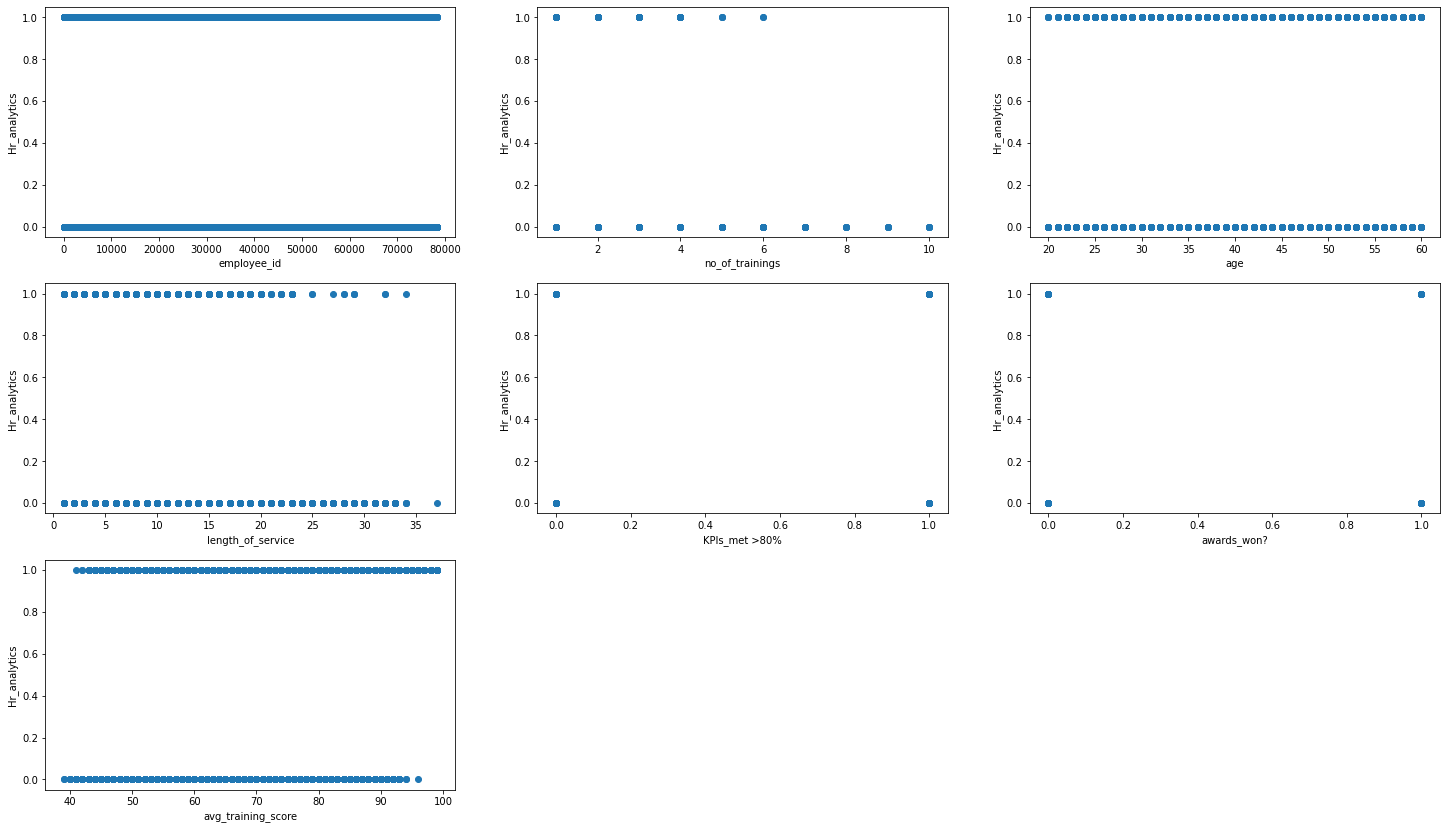

In [93]:
j=0
plt.figure(figsize=(25,50))
for column in numerical_col:
    plt.subplot(10,3,j+1)
    plt.scatter(train[column],train["is_promoted"])
    plt.xlabel(column)
    plt.ylabel("Hr_analytics")
    j=j+1

In [94]:
discriatecols=[]
continuescols=[]
for columns in numerical_col:
    if train[columns].nunique()>=20:
        continuescols.append(columns)
    else:
        discriatecols.append(columns)

In [95]:
continuescols

['employee_id', 'age', 'length_of_service', 'avg_training_score']

In [96]:
discriatecols

['no_of_trainings', 'KPIs_met >80%', 'awards_won?']

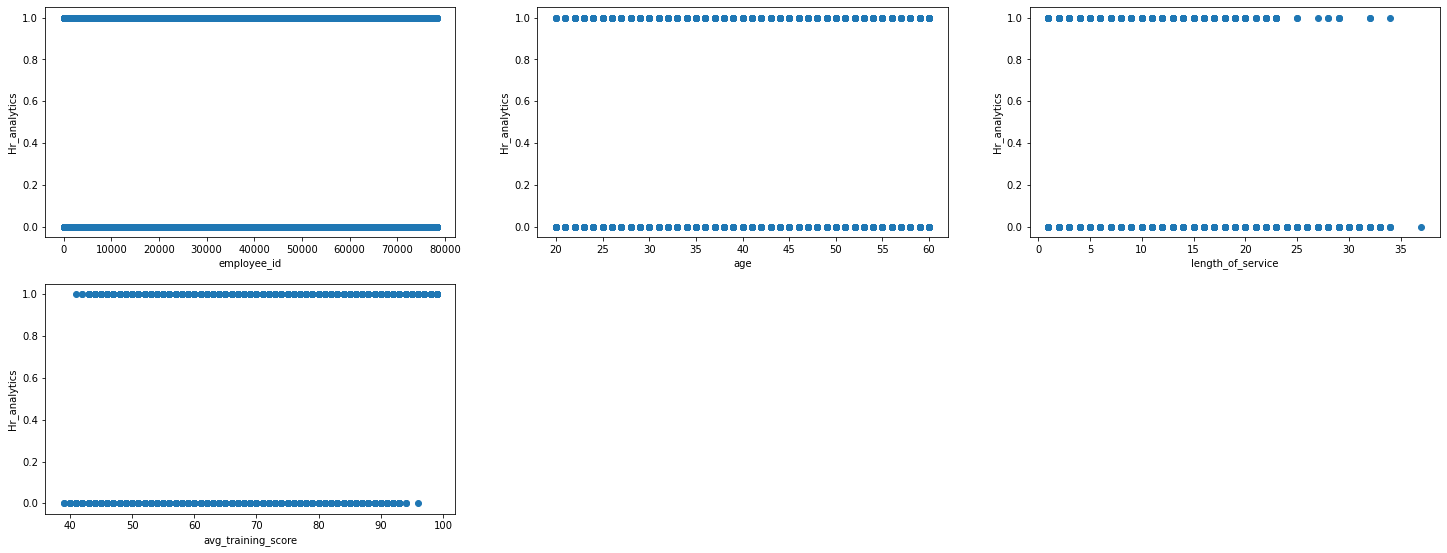

In [97]:
j=0
plt.figure(figsize=(25,50))
for column in continuescols:
    plt.subplot(10,3,j+1)
    plt.scatter(train[column],train["is_promoted"])
    plt.xlabel(column)
    plt.ylabel("Hr_analytics")
    j=j+1

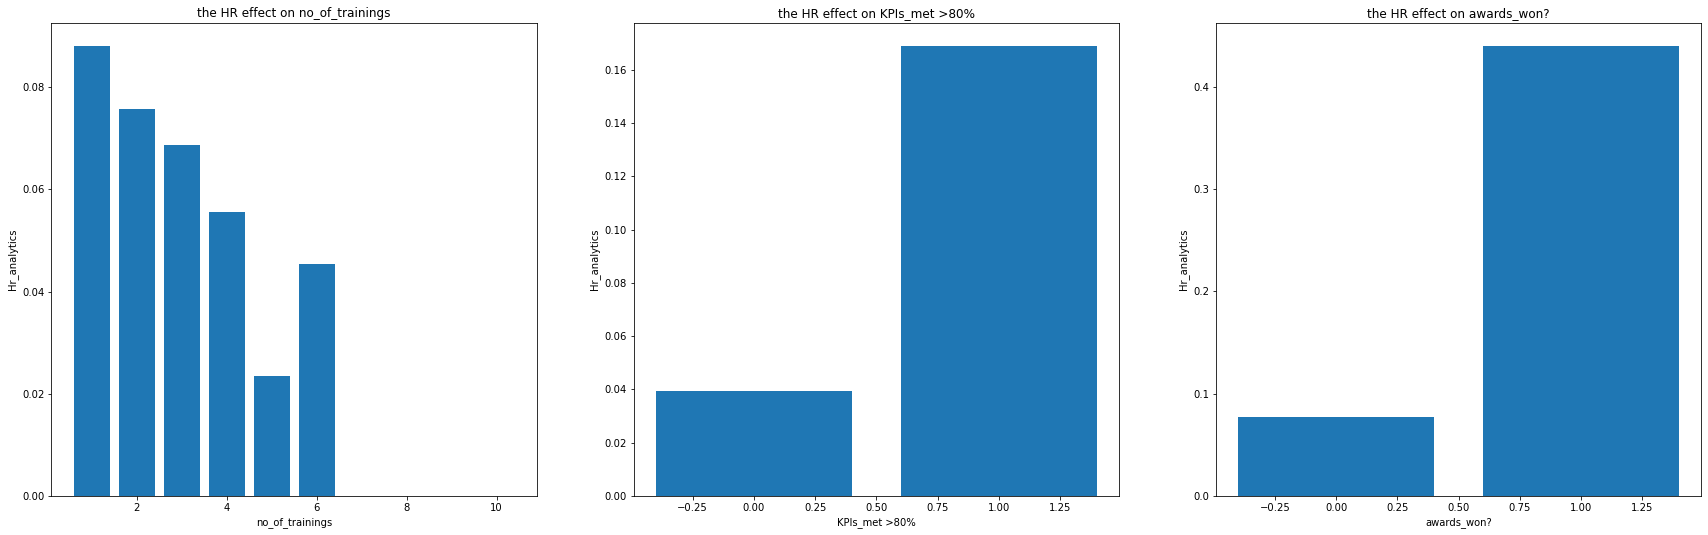

In [98]:
j=0
plt.figure(figsize=(40,40))
for column in discriatecols:
    plt.subplot(4,4,j+1)
    observationval=train.groupby(column)["is_promoted"].mean()
    observationvalDF=pd.DataFrame(observationval).sort_values(by= "is_promoted",ascending=False)
    observationvalDF.reset_index(inplace=True)
    plt.bar(observationvalDF[column],observationvalDF['is_promoted'])
    plt.title(f"the HR effect on {column}")
    plt.xlabel(column)
    plt.ylabel("Hr_analytics")
    j=j+1

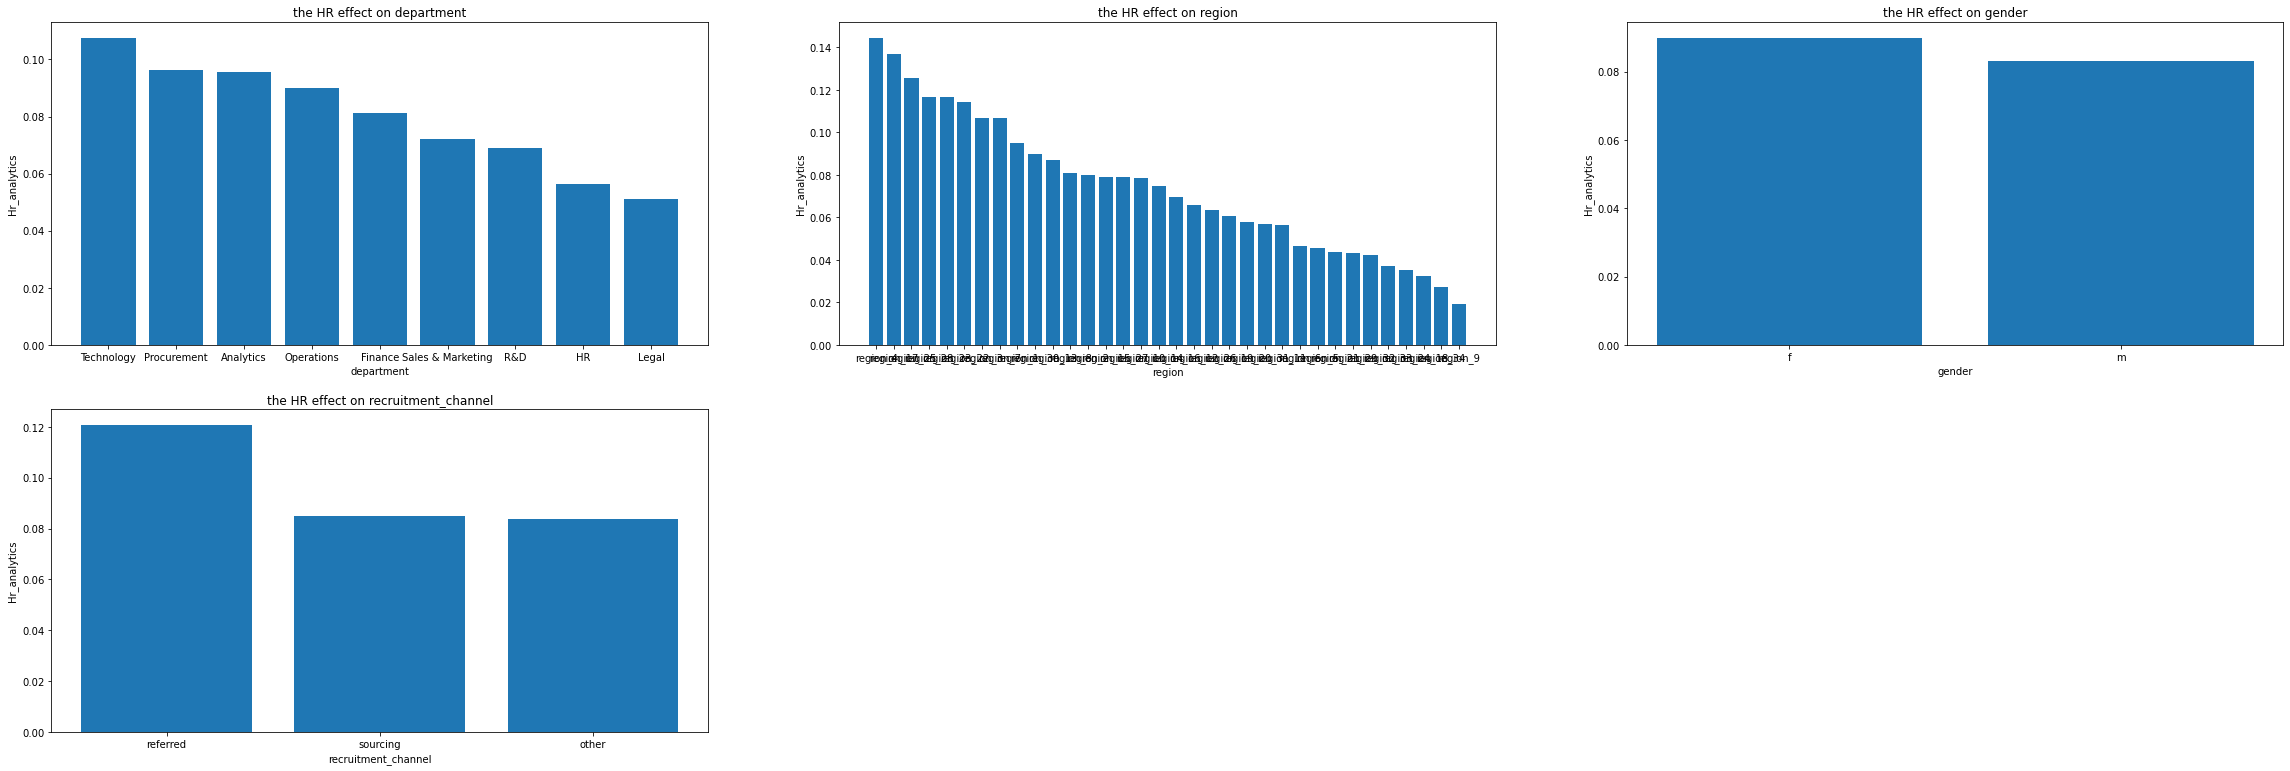

In [99]:
j=0
plt.figure(figsize=(40,70))
for column in object_col:
    plt.subplot(10,3,j+1)
    observationval=train.groupby(column)["is_promoted"].mean()
    observationvalDF=pd.DataFrame(observationval).sort_values(by= "is_promoted",ascending=False)
    observationvalDF.reset_index(inplace=True)
    plt.bar(observationvalDF[column],observationvalDF['is_promoted'])
    plt.title(f"the HR effect on {column}")
    plt.xlabel(column)
    plt.ylabel("Hr_analytics")
    j=j+1

In [100]:

    upper_limit=train["age"].mean()+3*train["age"].std()
    lower_limit=train["age"].mean()-3*train["age"].std()        #capping steps using for loop
    train.loc[(train["age"]>upper_limit),column]=upper_limit
    train.loc[(train["age"]<lower_limit),column]=lower_limit

In [101]:
continuescols

['employee_id', 'age', 'length_of_service', 'avg_training_score']

In [102]:
train[(train['age']<= upper_limit )& (train['age'] >= lower_limit)]

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,f,sourcing,1,35,8,1,0,49,0
1,65141,Operations,region_22,m,other,1,30,4,0,0,60,0
2,7513,Sales & Marketing,region_19,m,sourcing,1,34,7,0,0,50,0
3,2542,Sales & Marketing,region_23,m,other,2,39,10,0,0,50,0
4,48945,Technology,region_26,m,other,1,45,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,m,sourcing,1,48,17,0,0,78,0
54804,74592,Operations,region_27,f,other,1,37,6,0,0,56,0
54805,13918,Analytics,region_1,m,other,1,27,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,m,sourcing,1,29,2,0,0,45,0


In [103]:
train.dtypes

employee_id             int64
department             object
region                 object
gender                 object
recruitment_channel    object
no_of_trainings         int64
age                     int64
length_of_service       int64
KPIs_met >80%           int64
awards_won?             int64
avg_training_score      int64
is_promoted             int64
dtype: object

In [104]:
train["age"].duplicated().sum()

54767

In [105]:
train["age"].shape

(54808,)